In [9]:
#Hierarchical clustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
Univ=pd.read_csv("Universities.csv")

In [2]:
#function for noramlisation
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [3]:
df_norm=norm_func(Univ.iloc[:,1:]) #keeping all row,removing one column
type(df_norm)

pandas.core.frame.DataFrame

In [4]:
#applying hierarchical clustering
z=linkage(df_norm,method="complete",metric="euclidean")
z

array([[11.        , 21.        ,  0.10626637,  2.        ],
       [12.        , 22.        ,  0.13187683,  2.        ],
       [ 8.        , 24.        ,  0.13239629,  2.        ],
       [ 5.        ,  6.        ,  0.15357479,  2.        ],
       [ 4.        , 25.        ,  0.18518411,  3.        ],
       [10.        , 16.        ,  0.19782036,  2.        ],
       [28.        , 30.        ,  0.24629762,  4.        ],
       [ 0.        ,  7.        ,  0.26741814,  2.        ],
       [ 3.        , 29.        ,  0.27803629,  4.        ],
       [14.        , 27.        ,  0.30357016,  3.        ],
       [31.        , 34.        ,  0.34007072,  7.        ],
       [32.        , 33.        ,  0.34110215,  6.        ],
       [13.        , 23.        ,  0.39456348,  2.        ],
       [ 9.        , 19.        ,  0.4942792 ,  2.        ],
       [26.        , 36.        ,  0.50082808,  8.        ],
       [15.        , 17.        ,  0.55679044,  2.        ],
       [18.        , 20.

In [5]:
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

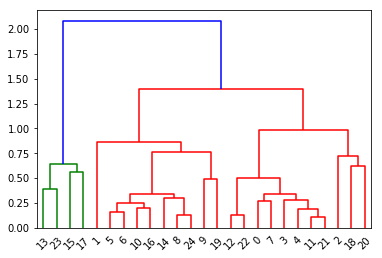

In [11]:
sch.dendrogram(z)
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3, linkage="complete", affinity="euclidean").fit(df_norm)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0     0
1     2
2     0
3     0
4     0
5     2
6     2
7     0
8     2
9     2
10    2
11    0
12    0
13    1
14    2
15    1
16    2
17    1
18    0
19    2
20    0
21    0
22    0
23    1
24    2
dtype: int64

In [39]:
Univ['clust']=cluster_labels#clust variable will be add
Univ=Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ

,GradRate,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses
0,94,0,Brown,1310,89,22,13,22704
1,81,2,CalTech,1415,100,25,6,63575
2,72,0,CMU,1260,62,59,9,25026
3,88,0,Columbia,1310,76,24,12,31510
4,90,0,Cornell,1280,83,33,13,21864
5,95,2,Dartmouth,1340,89,23,10,32162
6,95,2,Duke,1315,90,30,12,31585
7,92,0,Georgetown,1255,74,24,12,20126
8,97,2,Harvard,1400,91,14,11,39525
9,87,2,JohnsHopkins,1305,75,44,7,58691


In [41]:
aggregate=Univ.iloc[:,2:].groupby(Univ.clust).mean()
aggregate

,SAT,Top10,Accept,SFRatio,Expenses
clust,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091
1,1061.5,38.750000,70.000000,19.250000,9953.000000
2,1355.5,89.000000,26.900000,10.000000,40897.200000


In [43]:
Univ.to_csv("university_clust.csv")